# HEUR 
# K-armed bandit problem: theory 

## Introduction 

In probability theory and machine learning, multi-armed bandit problem reffers to a model which can be seen as a set of real distributions $\{F_1,\dots,F_K\}$, each distribution being associated with the rewards delivered by one of the $K\in\N^+$ levers. Let $\mu_1,\dots,\mu_K$ be the mean values associated with these reward distributions. The gambler iteratively plays one lever per round and observes the associated reward. The objective is to maximize the sum of the collected rewards. Several strategies or algorithms have been proposed as a solution to this problem in the last two decades. In this project, we will focus on the comparison of basic strategies in order to find (heuristically) best option.

We define
* $\mathtt{episode}$ as the number of games,
* horizon $\mathtt{iters}$ as the number of rounds to be played in each game,
* maximum mean reward as $\mu^* = \mathtt{max}\{\mu_1,\mu_2\,... \mu_K\},$
* regret $\rho$ after $T$ rounds played as $\rho(T) = T\mu^* - \sum_{t=1}^{T}r_t,$ where $r_t$ is the reward in round $t$ ($\rho$ is also a random variable),
* expected regret as $\mathbb{E}[\rho(T)]$,
* letter $\mathtt{k}$ for the levers (arms).

"One way to approach this is to select each one in turn and keep track of how much you received, then keep going back to the one that paid out the most. This is possible, but each bandit has an underlying probability distribution associated with it, meaning that you may need more samples before finding the right one. But, each pull you spend trying to figure out the best bandit to play takes you away from maximizing your reward. This basic balancing act is known as the explore-exploit dilemma." - *Christian Hubbs, TowardDataScience*

In [1]:
from IPython.display import Video
Video("multi_armed_bandit.webm", width=700)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

## Startegies

For the purpose of following vizualisation, lets set:

In [3]:
# Number of arms
k = 10
# Number of rounds to be played within each game
iters = 1_000
# Number of games to be played
episodes = 1_000
# Mean values of arms ('random', 'sequence', 'sequence2', list, array)
mu_input = 'sequence'

### $\varepsilon$-first strategy

In [4]:
from bandits import eps_first_bandit

Before properly introducing the $\epsilon$-first strategy, lets talk about the exploration-explotation dilemma. This dilemma defines a problem, which is trying to optimize the balance between the (random) exploring part and the part, in which is used the knowledge obtained during the experiment.  

In [5]:
# Choose strategies
eps0=0
eps1=0.05
eps2=0.10
eps3=0.20 

In [6]:
# Initialization
eps_0_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)
eps_2_rewards = np.zeros(iters)
eps_3_rewards = np.zeros(iters)
eps_0_selection = np.zeros(k)
eps_1_selection = np.zeros(k)
eps_2_selection = np.zeros(k)
eps_3_selection = np.zeros(k)
eps_0_rewards_cum = np.zeros(iters)
eps_1_rewards_cum = np.zeros(iters)
eps_2_rewards_cum = np.zeros(iters)
eps_3_rewards_cum = np.zeros(iters)

# Run experiments
for i in range(episodes):
    # Initialize bandits
    eps_0 = eps_first_bandit(k, eps0, iters, mu=mu_input)
    eps_1 = eps_first_bandit(k, eps1, iters, eps_0.mu.copy())
    eps_2 = eps_first_bandit(k, eps2, iters, eps_0.mu.copy())
    eps_3 = eps_first_bandit(k, eps3, iters, eps_0.mu.copy())
    
    # Run experiments
    eps_0.run()
    eps_1.run()
    eps_2.run()
    eps_3.run()
    
    # Update long-term averages
    eps_0_rewards = eps_0_rewards + (
        eps_0.reward - eps_0_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (
        eps_1.reward - eps_1_rewards) / (i + 1)
    eps_2_rewards = eps_2_rewards + (
        eps_2.reward - eps_2_rewards) / (i + 1)
    eps_3_rewards = eps_3_rewards + (
        eps_3.reward - eps_3_rewards) / (i + 1)

    # Average actions per episode
    eps_0_selection = eps_0_selection + (
        eps_0.k_n - eps_0_selection) / (i + 1)
    eps_1_selection = eps_1_selection + (
        eps_1.k_n - eps_1_selection) / (i + 1)
    eps_2_selection = eps_2_selection + (
        eps_2.k_n - eps_2_selection) / (i + 1)
    eps_3_selection = eps_3_selection + (
        eps_3.k_n - eps_3_selection) / (i + 1)

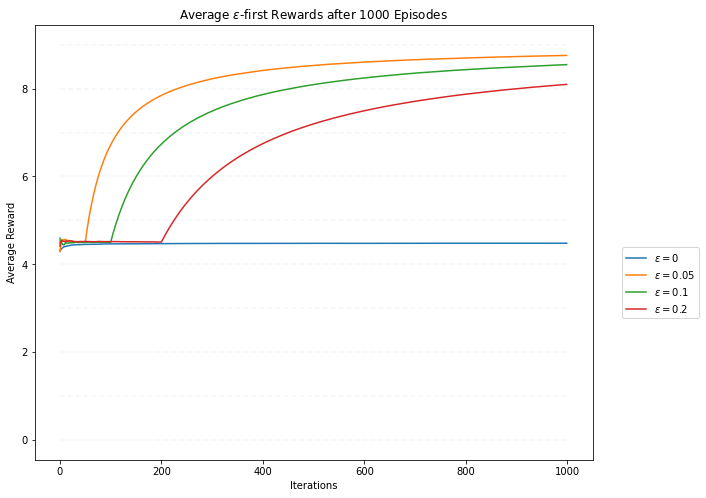

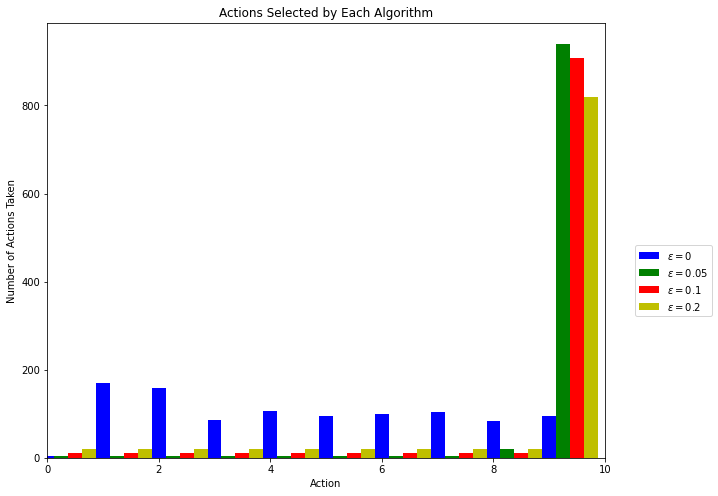

Percentage of actions selected:


,a = 0,a = 1,a = 2,a = 3,a = 4,a = 5,a = 6,a = 7,a = 8,a = 9
eps=0,0.4367,16.9393,15.9240,8.6000,10.6000,9.4000,9.9000,10.4000,8.3000,9.5000
eps=0.05,0.5188,0.5089,0.5001,0.5025,0.5146,0.5082,0.5120,0.5009,1.9028,94.0312
eps=0.1,1.0168,1.0156,1.0110,1.0015,1.0037,1.0176,1.0039,0.9977,1.1081,90.8241
eps=0.2,1.9852,1.9921,2.0341,2.0235,2.0192,2.0014,2.0058,2.0148,2.0287,81.8952


In [7]:
# Plot average rewards    
plt.figure(figsize=(10,8))
plt.plot(eps_0_rewards, label="$\epsilon=$"+str(eps0))
plt.plot(eps_1_rewards, label="$\epsilon=$"+str(eps1))
plt.plot(eps_2_rewards, label="$\epsilon=$"+str(eps2))
plt.plot(eps_3_rewards, label="$\epsilon=$"+str(eps3))
for i in range(k):
    plt.hlines(eps_0.mu[i], xmin=0,
              xmax=iters, alpha=0.05,
              linestyle="--")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon$-first Rewards after " + 
     str(episodes) + " Episodes")
plt.show()

# Counts of actions
bins = np.linspace(0, k-1, k)

plt.figure(figsize=(10,8))
plt.bar(bins, eps_0_selection, 
        width = 0.25, color='b', 
        label="$\epsilon=$"+str(eps0))
plt.bar(bins+0.25, eps_1_selection,
        width=0.25, color='g', 
        label="$\epsilon=$"+str(eps1))
plt.bar(bins+0.50, eps_2_selection, 
        width=0.25, color='r',
        label="$\epsilon=$"+str(eps2))
plt.bar(bins+0.75, eps_3_selection, 
        width=0.25, color='y',
        label="$\epsilon=$"+str(eps3))
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlim([0,k])
plt.title("Actions Selected by Each Algorithm")
plt.xlabel("Action")
plt.ylabel("Number of Actions Taken")
plt.show()

opt_per = np.array([eps_0_selection, eps_1_selection,
                   eps_2_selection, eps_3_selection]) / iters * 100
df = pd.DataFrame(opt_per, index=['eps='+str(eps0), 
    'eps='+str(eps1), 'eps='+str(eps2), 'eps='+str(eps3)],
                 columns=["a = " + str(x) for x in range(0, k)])
print("Percentage of actions selected:")
df

### $\varepsilon$-greedy strategy

In [8]:
from bandits import eps_greedy_bandit

The $\varepsilon$-greedy strategy is one of the most basic option for dealing with multi armed bandit problem and is widely used because of its simplicity. It is based on finding the balance between exploration and exploitation action within the algorithm. At each round the algorithm selects
the arm with the highest empirical mean with probability $1 − \varepsilon$, and selects a random arm with probability $\varepsilon$. In other word, the probability $p_i$ of choosing the $i$-th arm in the next round $t+1$ is $$p_i(t+1)=\begin{cases}&1-\varepsilon + \frac{\varepsilon}{k}\quad\text{    if }i=\text{argmax}_{j}\hat{\mu_j}(t),\\&\frac{\varepsilon}{k}\quad\text{otherwise},\end{cases}$$
where $k$ is the number of arms and $\hat{\mu_j}(t)$ is the empirical mean of $j$-th arm after $t$ turns.

Choosing $\varepsilon=0$ leads to an 0- greedy algorithm, in which is in the first round randomly selected an arm that is being pulled for the rest of the game. 

Settings for the experiment:

In [9]:
# Choose strategies
eps0=0
eps1=0.05
eps2=0.10
eps3=0.20 

In [13]:
# Initialization
eps_0_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)
eps_2_rewards = np.zeros(iters)
eps_3_rewards = np.zeros(iters)
eps_0_selection = np.zeros(k)
eps_1_selection = np.zeros(k)
eps_2_selection = np.zeros(k)
eps_3_selection = np.zeros(k)
eps_0_rewards_cum = np.zeros(iters)
eps_1_rewards_cum = np.zeros(iters)
eps_2_rewards_cum = np.zeros(iters)
eps_3_rewards_cum = np.zeros(iters)

# Run experiments
for i in range(episodes):
    # Initialize bandits
    eps_0 = eps_greedy_bandit(k, eps0, iters, mu=mu_input)
    eps_1 = eps_greedy_bandit(k, eps1, iters, eps_0.mu.copy())
    eps_2 = eps_greedy_bandit(k, eps2, iters, eps_0.mu.copy())
    eps_3 = eps_greedy_bandit(k, eps3, iters, eps_0.mu.copy())
    
    # Run experiments
    eps_0.run()
    eps_1.run()
    eps_2.run()
    eps_3.run()
    
    # Update long-term averages
    eps_0_rewards = eps_0_rewards + (
        eps_0.reward - eps_0_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (
        eps_1.reward - eps_1_rewards) / (i + 1)
    eps_2_rewards = eps_2_rewards + (
        eps_2.reward - eps_2_rewards) / (i + 1)
    eps_3_rewards = eps_3_rewards + (
        eps_3.reward - eps_3_rewards) / (i + 1)

    # Average actions per episode
    eps_0_selection = eps_0_selection + (
        eps_0.k_n - eps_0_selection) / (i + 1)
    eps_1_selection = eps_1_selection + (
        eps_1.k_n - eps_1_selection) / (i + 1)
    eps_2_selection = eps_2_selection + (
        eps_2.k_n - eps_2_selection) / (i + 1)
    eps_3_selection = eps_3_selection + (
        eps_3.k_n - eps_3_selection) / (i + 1)

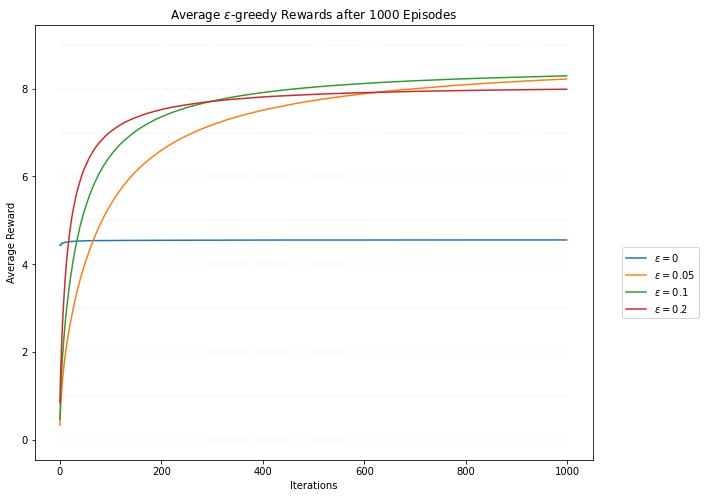

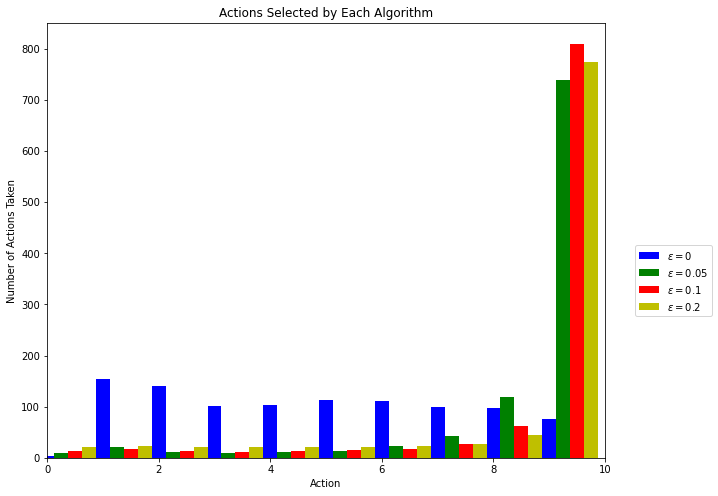

Percentage of actions selected:


,a = 0,a = 1,a = 2,a = 3,a = 4,a = 5,a = 6,a = 7,a = 8,a = 9
eps=0,0.2662,15.3694,13.9740,10.0904,10.4000,11.4000,11.2000,9.9000,9.8000,7.6000
eps=0.05,0.9731,2.0943,1.2311,0.9280,1.1312,1.3650,2.2726,4.2753,11.8456,73.8838
eps=0.1,1.3347,1.6640,1.2522,1.2121,1.3457,1.4637,1.7479,2.7875,6.1707,81.0215
eps=0.2,2.1860,2.2426,2.1153,2.1096,2.0916,2.1768,2.3739,2.7505,4.4736,77.4801


In [14]:
# Plot average rewards    
plt.figure(figsize=(10,8))
plt.plot(eps_0_rewards, label="$\epsilon=$"+str(eps0))
plt.plot(eps_1_rewards, label="$\epsilon=$"+str(eps1))
plt.plot(eps_2_rewards, label="$\epsilon=$"+str(eps2))
plt.plot(eps_3_rewards, label="$\epsilon=$"+str(eps3))
for i in range(k):
    plt.hlines(eps_0.mu[i], xmin=0,
              xmax=iters, alpha=0.05,
              linestyle="--")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon$-greedy Rewards after " + 
     str(episodes) + " Episodes")
plt.show()

# Counts of actions
bins = np.linspace(0, k-1, k)

plt.figure(figsize=(10,8))
plt.bar(bins, eps_0_selection, 
        width = 0.25, color='b', 
        label="$\epsilon=$"+str(eps0))
plt.bar(bins+0.25, eps_1_selection,
        width=0.25, color='g', 
        label="$\epsilon=$"+str(eps1))
plt.bar(bins+0.50, eps_2_selection, 
        width=0.25, color='r',
        label="$\epsilon=$"+str(eps2))
plt.bar(bins+0.75, eps_3_selection, 
        width=0.25, color='y',
        label="$\epsilon=$"+str(eps3))
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlim([0,k])
plt.title("Actions Selected by Each Algorithm")
plt.xlabel("Action")
plt.ylabel("Number of Actions Taken")
plt.show()

opt_per = np.array([eps_0_selection, eps_1_selection,
                   eps_2_selection, eps_3_selection]) / iters * 100
df = pd.DataFrame(opt_per, index=['eps='+str(eps0), 
    'eps='+str(eps1), 'eps='+str(eps2), 'eps='+str(eps3)],
                 columns=["a = " + str(x) for x in range(0, k)])
print("Percentage of actions selected:")
df

### $\varepsilon$-decay strategy

In [11]:
from bandits import eps_decay_bandit

The $\varepsilon$-greedy strategies have an obvious weakness in that they continue to include random noise no matter how many examples they see. The $\varepsilon$-decay, also known as $\varepsilon$-decreasing strategy, is one of many modifications of $\varepsilon$-greedy strategies. This strategy reduces the probability of exploration with every step, turning constant $\varepsilon$ into the function of number of rounds played $\varepsilon(t)$. We define $$\varepsilon(t)=\frac{1}{1+\beta t},$$ where $\beta<1$ is used for scaling. 

In [12]:
# Initialization
eps_decay_rewards = np.zeros(iters)
eps_greedy_rewards = np.zeros(iters)
eps_decay_selection = np.zeros(k)
eps_greedy_selection = np.zeros(k)

# Run experiments
for i in range(episodes):
    # Initialize bandits
    eps_decay = eps_decay_bandit(k, iters, 1/k, mu=mu_input)
    eps_greedy = eps_greedy_bandit(k, 0.1, iters, eps_decay.mu.copy())
    
    # Run experiments
    eps_decay.run()
    eps_greedy.run()
    
    # Update long-term averages
    eps_decay_rewards = eps_decay_rewards + (
        eps_decay.reward - eps_decay_rewards) / (i + 1)
    eps_greedy_rewards = eps_greedy_rewards + (
        eps_greedy.reward - eps_greedy_rewards) / (i + 1)

    # Average actions per episode
    eps_decay_selection = eps_decay_selection + (
        eps_decay.k_n - eps_decay_selection) / (i + 1)
    eps_greedy_selection = eps_greedy_selection + (
        eps_greedy.k_n - eps_greedy_selection) / (i + 1)
    

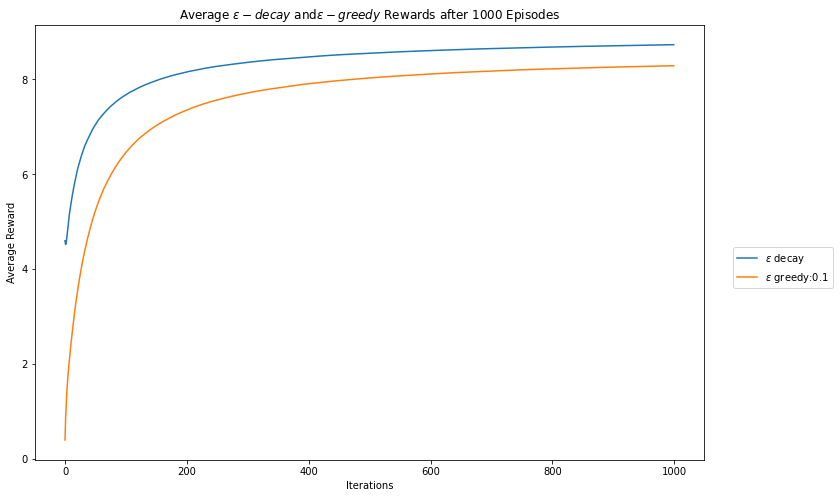

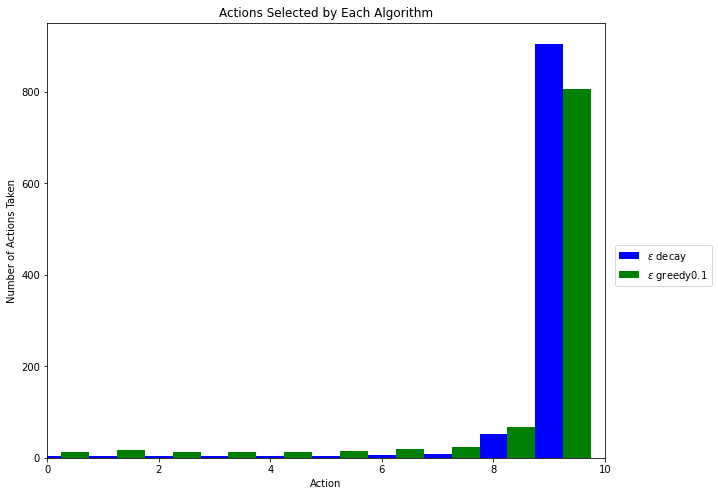

Percentage of actions selected:


,a = 0,a = 1,a = 2,a = 3,a = 4,a = 5,a = 6,a = 7,a = 8,a = 9
decay,0.4686,0.4759,0.4715,0.4679,0.4789,0.4939,0.5365,0.8651,5.182,90.5597
greedy,1.3070,1.6791,1.3278,1.2173,1.3204,1.4833,1.8359,2.3703,6.797,80.6619


In [15]:
# Average rewards
plt.figure(figsize=(12,8))
plt.plot(eps_decay_rewards, label="$\epsilon$ decay")
plt.plot(eps_greedy_rewards, label="$\epsilon$ greedy:"+str(eps_greedy.eps))
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-decay$ and" + 
    "$\epsilon-greedy$ Rewards after " 
    + str(episodes) + " Episodes")
plt.show()

# Counts of actions
bins = np.linspace(0, k-1, k)

plt.figure(figsize=(10,8))
plt.bar(bins, eps_decay_selection, 
        width = 0.5, color='b', 
        label="$\epsilon$ decay")
plt.bar(bins+0.5, eps_greedy_selection,
        width=0.5, color='g', 
        label="$\epsilon$ greedy"+str(eps_greedy.eps))
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlim([0,k])
plt.title("Actions Selected by Each Algorithm")
plt.xlabel("Action")
plt.ylabel("Number of Actions Taken")
plt.show()

opt_per = np.array([eps_decay_selection, eps_greedy_selection]) / iters * 100
df = pd.DataFrame(opt_per, index=['decay', 'greedy'],
                 columns=["a = " + str(x) for x in range(0, k)])
print("Percentage of actions selected:")
df

### Optimistic Initial Value strategy

If we leave the $\varepsilon$ strategies for a while, the Optimistic Initial value strategy offers almost oposite approach to finding optimal strategy. The difference lies within the absence of adding random noise in order to find best action. Instead, we over estimate the rewards of all the actions and continuously select the maximum. In this case, the algorithm explores early on as it seeks to maximize its returns while additional information allows the values to converge to their true means. This approach does require some additional background knowledge to be included in the set up because we need at least some idea of what the rewards are so that we can over estimate them.

Because of this definition, we can this strategy prepare from 0-greedy algorithm.

In [16]:
# Initialization
oiv_rewards = np.zeros(iters)
eps_decay_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)
oiv_selection = np.zeros(k)
eps_decay_selection = np.zeros(k)
eps_1_selection = np.zeros(k)

# Select initial values
oiv_init = np.repeat(10., k)

# Run experiments
for i in range(episodes):
    # Initialize bandits
    oiv_bandit = eps_greedy_bandit(k, 0, iters, mu=mu_input)
    oiv_bandit.k_reward = oiv_init.copy()
    oiv_bandit.k_n = np.ones(k)
    eps_decay = eps_decay_bandit(k, iters,1/k, oiv_bandit.mu.copy())
    eps_1 = eps_greedy_bandit(k, 0.1, iters, oiv_bandit.mu.copy())
    
    # Run experiments
    oiv_bandit.run()
    eps_decay.run()
    eps_1.run()
    
    # Update long-term averages
    oiv_rewards = oiv_rewards + (
        oiv_bandit.reward - oiv_rewards) / (i + 1)
    eps_decay_rewards = eps_decay_rewards + (
        eps_decay.reward - eps_decay_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (
        eps_1.reward - eps_1_rewards) / (i + 1)

    # Average actions per episode
    oiv_selection = oiv_selection + (
        oiv_bandit.k_n - oiv_selection) / (i + 1)
    eps_decay_selection = eps_decay_selection + (
        eps_decay.k_n - eps_decay_selection) / (i + 1)
    eps_1_selection = eps_1_selection + (
        eps_1.k_n- eps_1_selection) / (i + 1)
    


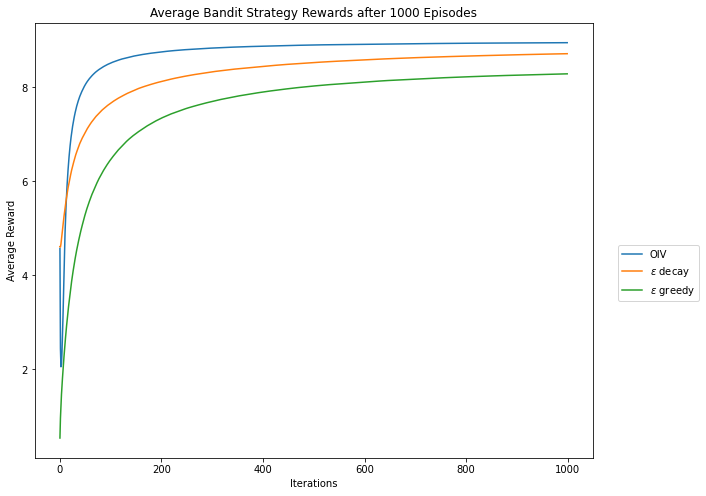

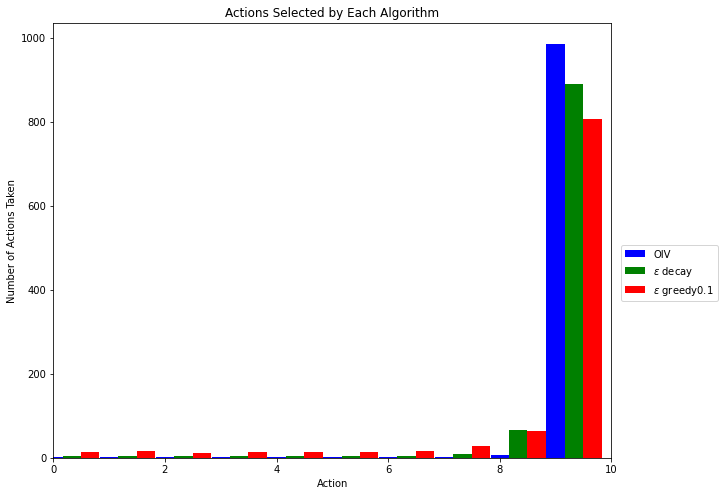

Percentage of actions selected:


,a = 0,a = 1,a = 2,a = 3,a = 4,a = 5,a = 6,a = 7,a = 8,a = 9
OIV,0.2000,0.2000,0.2000,0.2000,0.2002,0.2012,0.2093,0.2409,0.7627,98.5857
decay,0.4606,0.4697,0.4605,0.4738,0.4818,0.4959,0.5375,0.9519,6.5880,89.0803
greedy,1.3070,1.6791,1.3278,1.2173,1.3204,1.4833,1.8359,2.3703,6.7970,80.6619


In [17]:
# Average rewards
plt.figure(figsize=(10,8))
plt.plot(oiv_rewards, label="OIV")
plt.plot(eps_decay_rewards, label="$\epsilon$ decay")
plt.plot(eps_1_rewards, label="$\epsilon$ greedy")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average Bandit Strategy Rewards after " + 
    str(episodes) + " Episodes")
plt.show()

# Counts of actions
bins = np.linspace(0, k-1, k)

plt.figure(figsize=(10,8))
plt.bar(bins, oiv_selection, 
        width = 0.33, color='b', 
        label="OIV")
plt.bar(bins+0.33, eps_decay_selection,
        width=0.33, color='g', 
        label="$\epsilon$ decay")
plt.bar(bins+0.66, eps_1_selection,
        width=0.33, color='r', 
        label="$\epsilon$ greedy"+str(eps_greedy.eps))
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlim([0,k])
plt.title("Actions Selected by Each Algorithm")
plt.xlabel("Action")
plt.ylabel("Number of Actions Taken")
plt.show()

opt_per = np.array([oiv_selection,eps_decay_selection, eps_greedy_selection]) / iters * 100
df = pd.DataFrame(opt_per, index=['OIV','decay', 'greedy'],
                 columns=["a = " + str(x) for x in range(0, k)])
print("Percentage of actions selected:")
df

In [18]:
df = pd.DataFrame({"number of selections": oiv_bandit.k_n - 1,
                  "actual reward": oiv_bandit.mu,
                  "estimated reward": oiv_bandit.k_reward})
df = df.applymap(lambda x: np.round(x, 2))
df['number of selections'] = df['number of selections'].astype('int')
df

,number of selections,actual reward,estimated reward
0,1,0.0,5.16
1,1,1.0,5.13
2,1,2.0,6.30
3,1,3.0,6.96
4,1,4.0,6.72
5,1,5.0,8.16
6,1,6.0,8.15
7,1,7.0,8.09
8,1,8.0,8.65
9,991,9.0,8.96


### SoftMax strategy

In [19]:
from bandits import softmax_bandit

The SoftMax strategy takes $\varepsilon$ strategies to another level and pick each arm with a probability that is proportional to its average reward. Arms with greater empirical means are therefore picked with higher probability. In this project, we use Boltzmann (Gibbs) exploration $$p_i(t+1) =\frac{e^{\frac{\hat{\mu}_i}{\tau}}}{\sum_{j=1}^{k}e^{\frac{\hat{\mu}_j}{\tau}}},$$
where $\hat{\mu}_i$ is the estimated mean of the rewards brought by the lever $i$ and $\tau\in\R^+$ is a parameter called the temperature. The choice of $\tau$’s value is left to the user.

In [20]:
sfm_1_rewards = np.zeros(iters)
sfm_2_rewards = np.zeros(iters)
sfm_3_rewards = np.zeros(iters)
sfm_4_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)

# Run experiments
for i in range(episodes):
    # Initialize bandits
    sfm1 = softmax_bandit(k, iters, T=0.05, mu=mu_input)
    sfm2 = softmax_bandit(k, iters, T=0.1, mu=sfm1.mu.copy())
    sfm3 = softmax_bandit(k, iters, T=0.2, mu=sfm1.mu.copy())
    sfm4 = softmax_bandit(k, iters, T=3, mu=sfm1.mu.copy())
    eps_1 = eps_greedy_bandit(k, 0.1, iters, mu=sfm1.mu.copy())
    
    # Run experiments
    sfm1.run()
    sfm2.run()
    sfm3.run()
    sfm4.run()
    eps_1.run()
    
    # Update long-term averages
    sfm_1_rewards = sfm_1_rewards + (
        sfm1.reward - sfm_1_rewards) / (i + 1)
    sfm_2_rewards = sfm_2_rewards + (
        sfm2.reward - sfm_2_rewards) / (i + 1)
    sfm_3_rewards = sfm_3_rewards + (
        sfm3.reward - sfm_3_rewards) / (i + 1)
    sfm_4_rewards = sfm_4_rewards + (
        sfm4.reward - sfm_4_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (
        eps_1.reward - eps_1_rewards) / (i + 1)

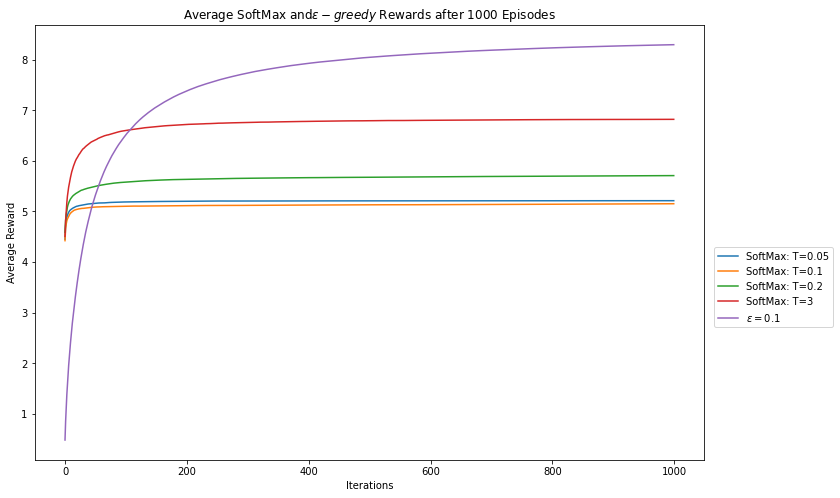

In [21]:
plt.figure(figsize=(12,8))
plt.plot(sfm_1_rewards, label="SoftMax: T="+str(sfm1.T))
plt.plot(sfm_2_rewards, label="SoftMax: T="+str(sfm2.T))
plt.plot(sfm_3_rewards, label="SoftMax: T="+str(sfm3.T))
plt.plot(sfm_4_rewards, label="SoftMax: T="+str(sfm4.T))
plt.plot(eps_1_rewards, label="$\epsilon=0.1$")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average SoftMax and" + 
    "$\epsilon-greedy$ Rewards after " 
    + str(episodes) + " Episodes")
plt.show()

### SoftMax using FSA - not used, not updated

In [22]:
from bandits import annealing_softmax_bandit

One way to upgrade the SoftMx strategy is the use of Fast Simulated Annealing. In this approach, the constant temperature $\tau$ is replaced by a function $\tau(t)$ defined as $$\tau(t) = \frac{T_0}{1+(\frac{t}{n_0})^\alpha},$$ where $T_0$ is an initial temperature and $\alpha, n_0$ are cooling parameters.

In [23]:
sfm_1_rewards = np.zeros(iters)
sfm_2_rewards = np.zeros(iters)
eps_1_rewards = np.zeros(iters)

# Run experiments
for i in range(episodes):
    # Initialize bandits
    sfm1 = annealing_softmax_bandit(k, iters, 1, 0.1,1 ,mu=mu_input)
    sfm2 = annealing_softmax_bandit(k, iters, 1, 0.5,1 ,mu=sfm1.mu.copy())
    eps_1 = softmax_bandit(k, iters, T=3, mu=sfm1.mu.copy())
    
    # Run experiments
    sfm1.run()
    sfm2.run()
    eps_1.run()
    
    # Update long-term averages
    sfm_1_rewards = sfm_1_rewards + (
        sfm1.reward - sfm_1_rewards) / (i + 1)
    sfm_2_rewards = sfm_2_rewards + (
        sfm2.reward - sfm_2_rewards) / (i + 1)
    eps_1_rewards = eps_1_rewards + (
        eps_1.reward - eps_1_rewards) / (i + 1)

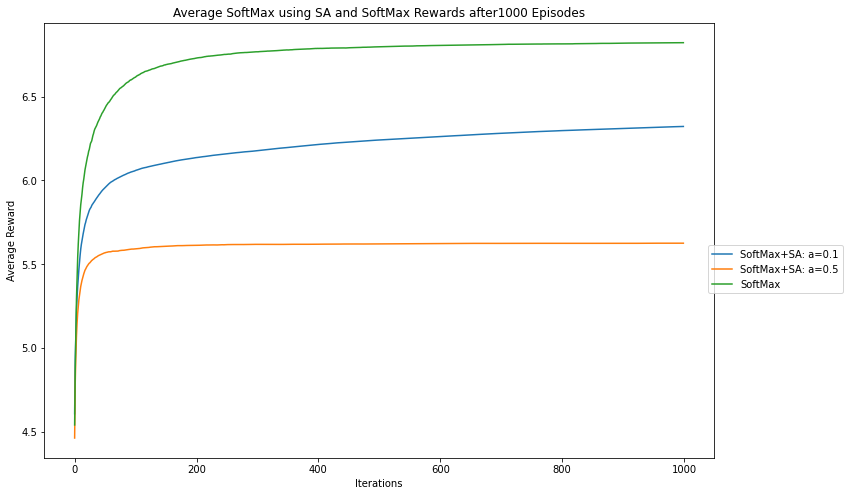

In [24]:
plt.figure(figsize=(12,8))
plt.plot(sfm_1_rewards, label="SoftMax+SA: a=0.1")
plt.plot(sfm_2_rewards, label="SoftMax+SA: a=0.5")
plt.plot(eps_1_rewards, label="SoftMax")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average SoftMax using SA and SoftMax Rewards after" 
    + str(episodes) + " Episodes")
plt.show()

# HEUR: K-armed bandit problem: comparison

Searching for the best strategy for playing 1000 rounds (normalized over 1000 games).

In [2]:
import numpy as np
import pandas as pd
from bandits import eps_greedy_bandit, eps_decay_bandit, softmax_bandit, annealing_softmax_bandit, eps_first_bandit
from tqdm import tqdm
import matplotlib.pyplot as plt 

# Number of arms
k = 10
# Number of rounds to be played within each game
iters = 1_000
# Number of games to be played
episodes = 1_000
# Mean values of arms ('random', 'sequence', 'sequence2', list, array)
mu_input = 'sequence'


## The best $\varepsilon$-first strategy

In [5]:
# Prepare output disctionary
eps_first_results = {}

for epsilon in tqdm(np.linspace(0,1,101)):
    epsilon = round(epsilon,2)
    # Initialization
    eps_rewards = np.zeros(iters)
    
    for i in range(episodes):
         # Initialize bandits
        eps_first_b = eps_first_bandit(k, epsilon, iters, mu=mu_input)
        # Run experiments
        eps_first_b.run()
        # Update long-term averages
        eps_rewards = eps_rewards + (eps_first_b.reward - eps_rewards) / (i + 1)
    
    eps_first_results['eps='+str(epsilon)] = eps_rewards
    
df_first= pd.DataFrame(data = eps_first_results, index=range(1000))

print('Best $epsilon$-greedy strategy:',df_first.loc[df_first.shape[0]-1].idxmax())

100%|██████████| 101/101 [1:50:46<00:00, 65.81s/it] 


Best $epsilon$-greedy strategy: eps=0.03


In [17]:
#save result
df_first.to_csv('df_first.csv')

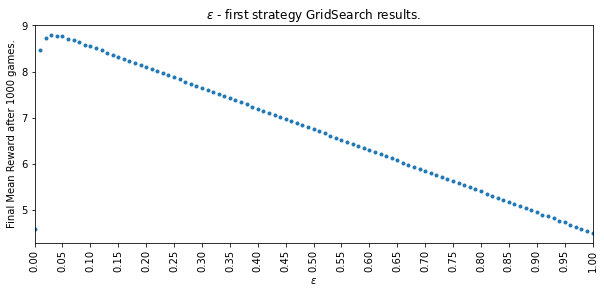

In [33]:
from tkinter import font


chop = pd.DataFrame()

chop['epsV'] = df_first.columns.to_list()
chop['reward'] = df_first.iloc[999].to_list()
chop['eps'] = chop['epsV'].apply(lambda x: x.replace('eps=','')).astype(float)
chop.head()

plt.figure(figsize=(10,4))
plt.plot(chop['eps'], chop['reward'], '.')
plt.xticks(np.linspace(0,1,21),rotation=90)
plt.xlabel('$\epsilon$')
plt.ylabel('Final Mean Reward after 1000 games.')
plt.title('$\epsilon$ - first strategy GridSearch results.')
plt.xlim((0,1))

plt.savefig('e_fisrt.png')

## The best $\varepsilon$-greedy strategy


In [34]:
# Prepare output disctionary
eps_greedy_results = {}

for epsilon in tqdm(np.linspace(0,1,101)):
    epsilon = round(epsilon,2)
    # Initialization
    eps_rewards = np.zeros(iters)
    
    for i in range(episodes):
         # Initialize bandits
        eps_greedy_b = eps_greedy_bandit(k, epsilon, iters, mu=mu_input)
        # Run experiments
        eps_greedy_b.run()
        # Update long-term averages
        eps_rewards = eps_rewards + (eps_greedy_b.reward - eps_rewards) / (i + 1)
    
    eps_greedy_results['eps='+str(epsilon)] = eps_rewards
    
df_greedy = pd.DataFrame(data = eps_greedy_results, index=range(1000))

#save result
df_greedy.to_csv('df_greedy.csv')

print('Best $epsilon$-greedy strategy:',df_greedy.loc[df_greedy.shape[0]-1].idxmax())

100%|██████████| 101/101 [22:27<00:00, 13.34s/it]

Best $epsilon$-greedy strategy: eps=0.07


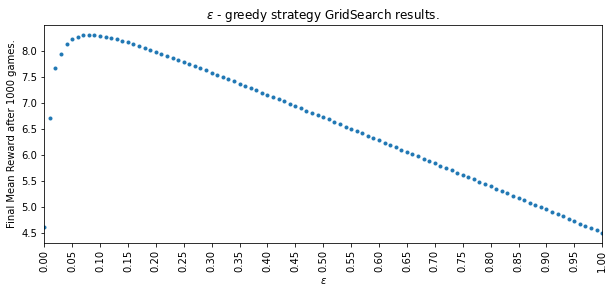

In [35]:
chop = pd.DataFrame()

chop['epsV'] = df_greedy.columns.to_list()
chop['reward'] = df_greedy.iloc[999].to_list()
chop['eps'] = chop['epsV'].apply(lambda x: x.replace('eps=','')).astype(float)
chop.head()

plt.figure(figsize=(10,4))
plt.plot(chop['eps'], chop['reward'], '.')
plt.xticks(np.linspace(0,1,21),rotation=90)
plt.xlabel('$\epsilon$')
plt.ylabel('Final Mean Reward after 1000 games.')
plt.title('$\epsilon$ - greedy strategy GridSearch results.')
plt.xlim((0,1))

plt.savefig('e_greedy.png')

## The best $\varepsilon$-decay strategy

In [36]:
eps_decay_results = {}

for beta in tqdm(np.linspace(0,1,101)):
    # Initialization
    bandit_rewards = np.zeros(iters)
    beta = round(beta,2)
    for i in range(episodes):
        bandit = eps_decay_bandit(k, iters, beta, mu=mu_input)
        # Run experiments
        bandit.run()
        # Update long-term averages
        bandit_rewards = bandit_rewards + (bandit.reward - bandit_rewards) / (i + 1)

    eps_decay_results['beta='+str(beta)] = bandit_rewards 

df_decay = pd.DataFrame(data = eps_decay_results, index=range(1000))

#save result
df_decay.to_csv('df_decay.csv')

print('Best $\epsilon$-decay strategy:',df_decay.loc[df_decay.shape[0]-1].idxmax())

100%|██████████| 101/101 [14:52<00:00,  8.84s/it]

Best $\epsilon$-decay strategy: beta=0.12


In [38]:
df_decay.head(1)

,beta=0.0,beta=0.01,beta=0.02,beta=0.03,beta=0.04,beta=0.05,beta=0.06,beta=0.07,beta=0.08,beta=0.09,...,beta=0.91,beta=0.92,beta=0.93,beta=0.94,beta=0.95,beta=0.96,beta=0.97,beta=0.98,beta=0.99,beta=1.0
0,4.579883,4.470319,4.551591,4.523011,4.527424,4.605504,4.528735,4.609664,4.618958,4.540322,...,4.600351,4.474727,4.297584,4.622758,4.539763,4.548922,4.589396,4.441602,4.420354,4.395054


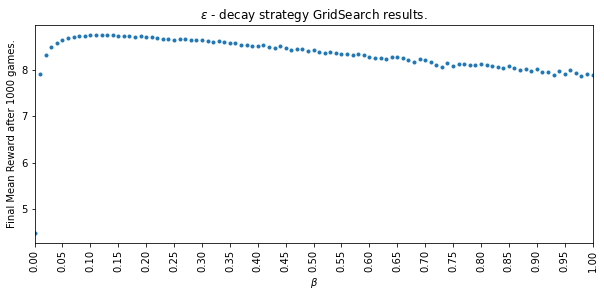

In [41]:
chop = pd.DataFrame()

chop['betaV'] = df_decay.columns.to_list()
chop['reward'] = df_decay.iloc[999].to_list()
chop['beta'] = chop['betaV'].apply(lambda x: x.replace('beta=','')).astype(float)
chop.head()

plt.figure(figsize=(10,4))
plt.plot(chop['beta'], chop['reward'], '.')
plt.xticks(np.linspace(0,1,21),rotation=90)
plt.xlabel('$\\beta$')
plt.ylabel('Final Mean Reward after 1000 games.')
plt.title('$\epsilon$ - decay strategy GridSearch results.')
plt.xlim((0,1))

plt.savefig('e_decay.png')

## The best Optimistic Value Strategy

The only thing we can change here are the initial estimates.

In [4]:
oiv_results = {}

for est in np.linspace(0,50,201):
    # Initialization
    bandit_rewards = np.zeros(iters)
    # Select initial values
    oiv_init = np.repeat(est, k)
    
    for i in range(episodes):
        bandit = eps_greedy_bandit(k, 0, iters, mu=mu_input)
        bandit.k_reward = oiv_init.copy()
        bandit.k_n = np.ones(k)
        # Run experiments
        bandit.run()
        # Update long-term averages
        bandit_rewards = bandit_rewards + (bandit.reward - bandit_rewards) / (i + 1)

    oiv_results['estimate='+str(est)] = bandit_rewards 

df_oiv = pd.DataFrame(data = oiv_results, index=range(1000))

df_oiv.to_csv('df_oiv.csv')

print('Best strategy:',df_oiv.loc[df_oiv.shape[0]-1].idxmax())

Best strategy: estimate=10.25


In [5]:
df_oiv.head(1)

,estimate=0.0,estimate=0.25,estimate=0.5,estimate=0.75,estimate=1.0,estimate=1.25,estimate=1.5,estimate=1.75,estimate=2.0,estimate=2.25,...,estimate=47.75,estimate=48.0,estimate=48.25,estimate=48.5,estimate=48.75,estimate=49.0,estimate=49.25,estimate=49.5,estimate=49.75,estimate=50.0
0,4.528554,4.461932,4.348648,4.433057,4.502325,4.48378,4.523028,4.488261,4.450629,4.638177,...,4.491668,4.447636,4.532095,4.488803,4.524359,4.572229,4.469988,4.428892,4.430612,4.737815


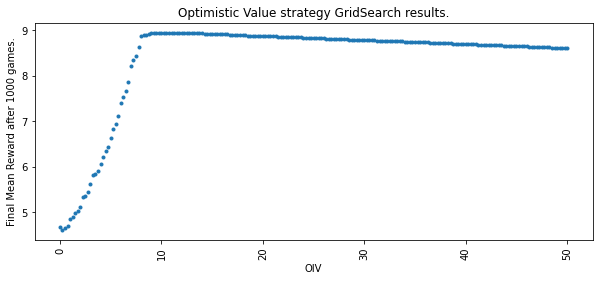

In [8]:
chop = pd.DataFrame()

chop['oivV'] = df_oiv.columns.to_list()
chop['reward'] = df_oiv.iloc[999].to_list()
chop['OIV'] = chop['oivV'].apply(lambda x: x.replace('estimate=','')).astype(float)
chop.head()

plt.figure(figsize=(10,4))
plt.plot(chop['OIV'], chop['reward'], '.')
plt.xticks(rotation=90)
plt.xlabel('OIV')
plt.ylabel('Final Mean Reward after 1000 games.')
plt.title('Optimistic Value strategy GridSearch results.')

plt.savefig('oiv.png')

## The best SoftMax strategy

In [3]:
softmax_results = {}

for temp in tqdm(np.linspace(0.05,5,100)):
    # Initialization
    bandit_rewards = np.zeros(iters)
    temp = round(temp,2)

    for i in range(episodes):
        bandit = softmax_bandit(k, iters, T=temp, mu=mu_input)
        # Run experiments
        bandit.run()
        # Update long-term averages
        bandit_rewards = bandit_rewards + (bandit.reward - bandit_rewards) / (i + 1)

    softmax_results['T='+str(temp)] = bandit_rewards 

df_softmax = pd.DataFrame(data = softmax_results, index=range(1000))

df_softmax.to_csv('df_sm.csv')

print('Best SoftMax strategy:',df_softmax.loc[df_softmax.shape[0]-1].idxmax())

100%|██████████| 100/100 [43:42<00:00, 26.22s/it]

Best SoftMax strategy: T=1.2


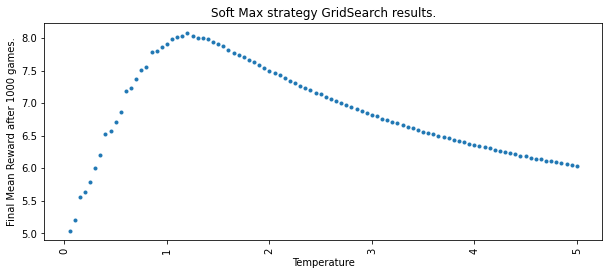

In [5]:
chop = pd.DataFrame()

chop['TV'] = df_softmax.columns.to_list()
chop['reward'] = df_softmax.iloc[999].to_list()
chop['Temperature'] = chop['TV'].apply(lambda x: x.replace('T=','')).astype(float)
chop.head()

plt.figure(figsize=(10,4))
plt.plot(chop['Temperature'], chop['reward'], '.')
plt.xticks(rotation=90)
plt.xlabel('Temperature')
plt.ylabel('Final Mean Reward after 1000 games.')
plt.title('Soft Max strategy GridSearch results.')

plt.savefig('SM.png')

## The best SoftMax strategy using Simulated Annealing - not used, not updated

In [ ]:
SA_softmax_results = {}

for alfa in tqdm(np.linspace(0.0001,1,11)):
    # Initialization
    bandit_rewards = np.zeros(iters)

    for i in range(episodes):
        bandit = annealing_softmax_bandit(k, iters, 1.15, alfa, 1, mu=mu_input)
        # Run experiments
        bandit.run()
        # Update long-term averages
        bandit_rewards = bandit_rewards + (bandit.reward - bandit_rewards) / (i + 1)
    SA_softmax_results['alfa='+str(alfa)] = bandit_rewards 

df_SA = pd.DataFrame(data = SA_softmax_results, index=range(1000))

df_SA.to_csv('df_sa.csv')

print('Best SoftMax + SA strategy:',df_SA.loc[df_SA.shape[0]-1].idxmax())

## The best SoftMax strategy using GA

In [28]:
from geneticalgorithm import geneticalgorithm as ga

In [29]:
def f(X):

    sfm_1_rewards = np.zeros(1000)

    for i in range(500):
        sfm1 = softmax_bandit(10, 1000, T=X, mu='sequence')
        sfm1.run()

        # Update long-term averages
        sfm_1_rewards = sfm_1_rewards + (
        sfm1.reward - sfm_1_rewards) / (i + 1)

    return -sfm_1_rewards[999]

 The best solution found:                                                                           
 [1.21448554]

 Objective function:
 -8.103570648351248


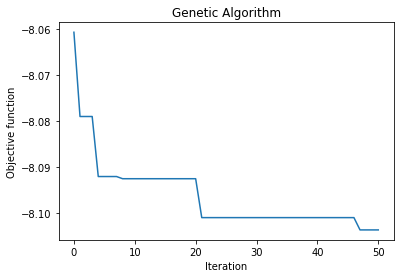

In [30]:
varbound=np.array([[0.5,1.5]]*1)

model=ga(function=f,dimension=1,variable_type='real',variable_boundaries=varbound, function_timeout=120)

model.run()

# Summary

In [18]:
sfm_ga_rewards = np.zeros(iters)

# Run experiments
for i in range(episodes):
    # Initialize bandits
    sfm_ga = softmax_bandit(k, iters, 1.16700524, mu=mu_input)
    
    # Run experiments
    sfm_ga.run()
   
    # Update long-term averages
    sfm_ga_rewards = sfm_ga_rewards + (
        sfm_ga.reward - sfm_ga_rewards) / (i + 1)

In [8]:
df_greedy = pd.read_csv("df_greedy.csv").drop(['Unnamed: 0'],axis=1)
df_first = pd.read_csv("df_first.csv").drop(['Unnamed: 0'],axis=1)
df_decay = pd.read_csv("df_decay.csv").drop(['Unnamed: 0'],axis=1)
df_softmax = pd.read_csv("df_sm.csv").drop(['Unnamed: 0'],axis=1)

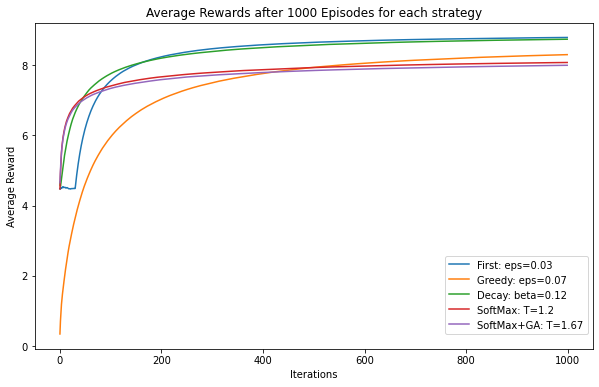

In [27]:
plt.figure(figsize=(10,6))
plt.plot(df_first[df_first.loc[df_first.shape[0]-1].idxmax()], label="First: "+df_first.loc[df_first.shape[0]-1].idxmax())
plt.plot(df_greedy[df_greedy.loc[df_greedy.shape[0]-1].idxmax()], label="Greedy: "+df_greedy.loc[df_greedy.shape[0]-1].idxmax())
plt.plot(df_decay[df_decay.loc[df_decay.shape[0]-1].idxmax()], label="Decay: "+df_decay.loc[df_decay.shape[0]-1].idxmax())
plt.plot(df_softmax[df_softmax.loc[df_softmax.shape[0]-1].idxmax()], label="SoftMax: "+df_softmax.loc[df_softmax.shape[0]-1].idxmax())
plt.plot(sfm_ga_rewards, label="SoftMax+GA: T=1.67")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average Rewards after " 
    + str(episodes) + " Episodes for each strategy")
plt.show()

In [20]:
df_first.tail()

,eps=0.0,eps=0.01,eps=0.02,eps=0.03,eps=0.04,eps=0.05,eps=0.06,eps=0.07,eps=0.08,eps=0.09,...,eps=0.91,eps=0.92,eps=0.93,eps=0.94,eps=0.95,eps=0.96,eps=0.97,eps=0.98,eps=0.99,eps=1.0
995,4.593858,8.457132,8.736162,8.791800,8.772553,8.761885,8.714304,8.673641,8.632359,8.582760,...,4.881459,4.840138,4.795173,4.743974,4.710303,4.659592,4.607603,4.564209,4.522863,4.504256
996,4.593868,8.457204,8.736271,8.791950,8.772753,8.762102,8.714590,8.674042,8.632777,8.583176,...,4.885630,4.844315,4.799348,4.748230,4.714566,4.663955,4.612032,4.568637,4.527337,4.504135
997,4.593936,8.457227,8.736412,8.792055,8.772970,8.762265,8.714880,8.674401,8.633187,8.583637,...,4.889798,4.848423,4.803525,4.752484,4.718830,4.668328,4.616451,4.573088,4.531837,4.504221
998,4.593928,8.457252,8.736528,8.792191,8.773134,8.762503,8.715110,8.674729,8.633556,8.584056,...,4.893881,4.852594,4.807732,4.756719,4.723116,4.672670,4.620879,4.577496,4.536272,4.504159
999,4.593918,8.457345,8.736636,8.792300,8.773335,8.762708,8.715380,8.675039,8.633963,8.584444,...,4.898039,4.856687,4.811907,4.761002,4.727402,4.677009,4.625284,4.581930,4.540669,4.504141
